In [297]:
import numpy as np
import pandas as pd
from scipy.stats import gmean
import seaborn as sns
import matplotlib.pyplot as plt

## Leave-one-out analysis

### Table

In [298]:
# settings
data_column = 'relative_WIS'
geometric_mean = True
# load data
data = pd.read_csv('accuracy-leave-one-out.csv', parse_dates=True)
# append number of peaks
data.loc[data['season'].isin(['2014-2015', '2015-2016', '2017-2018', '2023-2024']), 'peaks'] = 'one'
data.loc[data['season'].isin(['2016-2017', '2018-2019', '2019-2020', '2017-2018']), 'peaks'] = 'multiple' # double counting 2017-2018 because it is an edge case
# take geometric mean
if geometric_mean:
    print(data.groupby(by=['model', 'informed', 'use_ED_visits'])[data_column].apply(lambda x: gmean(x, axis=0)))
else:
    print(data.groupby(['model','informed', 'use_ED_visits'])[data_column].mean())

model                informed  use_ED_visits
oneStrain            False     False            0.686650
                               True             0.607683
                     True      False            0.579944
                               True             0.565298
sequentialTwoStrain  False     False            0.721967
                               True             0.652675
                     True      False            0.606497
                               True             0.562290
Name: relative_WIS, dtype: float64


### Triptec

/var/folders/61/1ybw0dkj0n3b7ds4ly3_wzcm0000gn/T/ipykernel_96206/3132838891.py:14: FutureWarning: The provided callable <function mean at 0x111edb240> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_model_df = filtered_df.groupby(["ED_informed", "model"])["relative_WIS"].agg(


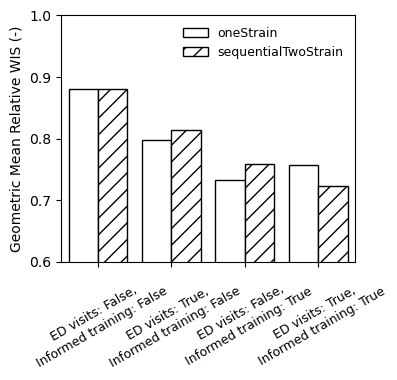

In [299]:
# Create categorical variable for ED visits and informed
filtered_df = data.copy()
filtered_df["ED_informed"] = filtered_df.apply(lambda row: f"ED visits: {row['use_ED_visits']},\nInformed training: {row['informed']}", axis=1)

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "//"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white

# Order categories logically
order = ["ED visits: False,\nInformed training: False", "ED visits: True,\nInformed training: False", 
         "ED visits: False,\nInformed training: True", "ED visits: True,\nInformed training: True"]

# Compute geometric means and errors
grouped_model_df = filtered_df.groupby(["ED_informed", "model"])["relative_WIS"].agg(
    mean=np.mean).reset_index()

# Plot 
fig, ax = plt.subplots(figsize=(8.3/2.05, 11.7/3))
sns.barplot(ax=ax, data=grouped_model_df, x="ED_informed", y="mean", hue="model", palette="Blues", order=order, edgecolor='black')

for i, artist in enumerate(ax.patches):
    if i in [0,1,2,3,8]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])

    else:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])


# Labels and formatting
ax.tick_params(axis='x', labelsize=9)  # Adjust '12' to your desired size
ax.set_xlabel(None)
ax.set_ylim([0.6,1])
ax.set_yticks([0.6, 0.7, 0.8, 0.9, 1])
ax.set_ylabel("Geometric Mean Relative WIS (-)")
ax.legend(framealpha=0, fontsize=9)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
plt.close()

/var/folders/61/1ybw0dkj0n3b7ds4ly3_wzcm0000gn/T/ipykernel_96206/2230900709.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Single peak', 'Multiple peaks'])


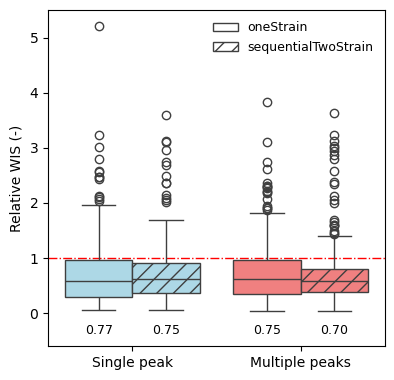

In [300]:
# Filter for the relevant conditions
filtered_df = data[(data['use_ED_visits'] == True) & (data['informed'] == True)]

# Compute mean WIS
geo_means = filtered_df.groupby(["peaks", "model"])["relative_WIS"].apply(lambda x: np.mean(x)).reset_index()

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "//"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white
peak_colors = {"one": "lightblue", "multiple": "lightcoral"}

# Visualization: Boxplot of relative_WIS
fig,ax = plt.subplots(figsize=(8.3/2.05, 11.7/3))

# horizontal line at relative WIS of 1
ax.axhline(y=1, color='red', linestyle='-.', linewidth=1)

# Make boxplot
sns.boxplot(ax=ax, data=filtered_df, x="peaks", y="relative_WIS", hue="model")

# Apply custom hatch styles
for i, artist in enumerate(ax.patches):
    if i in [0,1,4]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])
    else:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])
    if i in [0,2]:
        artist.set_facecolor(peak_colors['one'])
    elif i in [1,3]:
        artist.set_facecolor(peak_colors['multiple'])

# Add geometric mean annotations
for i, row in geo_means.iterrows():
    x_pos = ["one", "multiple"].index(row["peaks"])  # Map peaks to x positions
    model_offset = -0.2 if row["model"] == "oneStrain" else 0.2  # Slightly offset for visibility
    ax.text(x_pos + model_offset, -0.2, f'{row["relative_WIS"]:.2f}', 
            ha='center', va='top', fontsize=9, color='black')
    
ax.set_xticklabels(['Single peak', 'Multiple peaks'])
ax.set_xlabel(None)
ax.set_ylabel("Relative WIS (-)")
ax.set_ylim([-0.6,5.5])
ax.legend(loc=1, framealpha=0, fontsize=9)
plt.tight_layout()
plt.show()
plt.close()


/var/folders/61/1ybw0dkj0n3b7ds4ly3_wzcm0000gn/T/ipykernel_96206/2877462127.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate season labels for readability


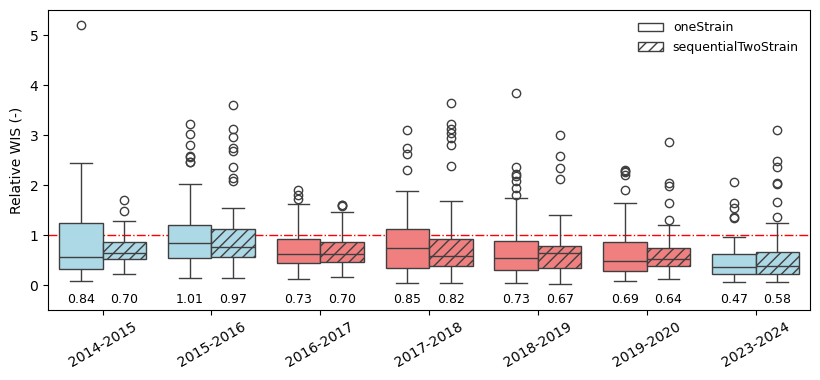

In [301]:
# Filter for the relevant conditions
filtered_df = data[(data['use_ED_visits'] == True) & (data['informed'] == True)]

# Compute mean WIS
geo_means = filtered_df.groupby(["season", "model"])["relative_WIS"].apply(lambda x: np.mean(x)).reset_index()

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "///"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white
peak_colors = {"one": "lightblue", "multiple": "lightcoral"}

# Visualization: Boxplot of relative_WIS per season
fig, ax = plt.subplots(figsize=(8.3, 11.7/3))

# horizontal line at relative WIS of 1
ax.axhline(y=1, color='red', linestyle='-.', linewidth=1)

# Make boxplot
sns.boxplot(ax=ax, data=filtered_df, x="season", y="relative_WIS", hue="model")

# Apply custom hatch styles
season = 2*["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2023-2024"]
for i, artist in enumerate(ax.patches):
    if i in [0,1,2,3,4,5,6,14]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])
    elif i in [7,8,9,10,11,12,13,15]:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])
    if i < 14:
        peaks_value = filtered_df[filtered_df["season"] == season[i]]["peaks"].unique()[0]
        artist.set_facecolor(peak_colors[peaks_value])

# Customizing the plot
ax.set_xlabel("")
ax.set_ylabel("Relative WIS (-)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)  # Rotate season labels for readability
ax.legend(loc=1, framealpha=0, fontsize=9)
ax.set_ylim([-0.5,5.5])

# Add mean annotations
for i, row in geo_means.iterrows():
    x_pos = ["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2023-2024"].index(row["season"])  # Map peaks to x positions
    model_offset = -0.2 if row["model"] == "oneStrain" else 0.2  # Slightly offset for visibility
    ax.text(x_pos + model_offset, -0.15, f'{row["relative_WIS"]:.2f}', 
            ha='center', va='top', fontsize=9, color='black')
plt.tight_layout()
plt.show()
plt.close()


/var/folders/61/1ybw0dkj0n3b7ds4ly3_wzcm0000gn/T/ipykernel_96206/1718467719.py:31: FutureWarning: The provided callable <function mean at 0x111edb240> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped_model_df = filtered_df.groupby(["ED_informed", "model"])["relative_WIS"].agg(
/var/folders/61/1ybw0dkj0n3b7ds4ly3_wzcm0000gn/T/ipykernel_96206/1718467719.py:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(['Single peak', 'Multiple peaks'])


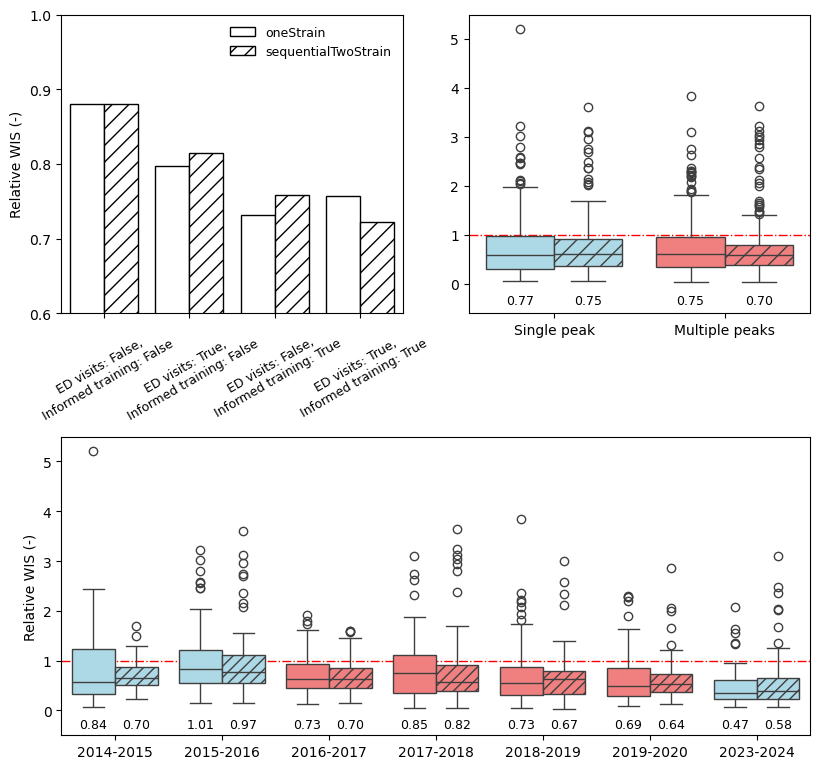

In [ ]:
# Create the figure and grid layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8.3, 11.7/3*2), 
                         gridspec_kw={'height_ratios': [1, 1]}, constrained_layout=False)

# Top row: Two figures (each taking half the width)
ax1 = axes[0, 0]  # First figure (top-left)
ax2 = axes[0, 1]  # Second figure (top-right)

# Bottom row: One figure spanning full width
fig.delaxes(axes[1, 0])  # Remove the bottom-left subplot
fig.delaxes(axes[1, 1])  # Remove the bottom-right subplot
ax3 = fig.add_subplot(2, 1, 2)  # Add a full-width subplot in the bottom row

##############
## FIGURE 1 ##
##############

# Create categorical variable for ED visits and informed
filtered_df = data.copy()
filtered_df["ED_informed"] = filtered_df.apply(lambda row: f"ED visits: {row['use_ED_visits']},\nInformed training: {row['informed']}", axis=1)

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "//"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white

# Order categories logically
order = ["ED visits: False,\nInformed training: False", "ED visits: True,\nInformed training: False", 
         "ED visits: False,\nInformed training: True", "ED visits: True,\nInformed training: True"]

# Compute geometric means and errors
grouped_model_df = filtered_df.groupby(["ED_informed", "model"])["relative_WIS"].agg(
    mean=np.mean).reset_index()

# Plot 
sns.barplot(ax=ax1, data=grouped_model_df, x="ED_informed", y="mean", hue="model", palette="Blues", order=order, edgecolor='black')

for i, artist in enumerate(ax1.patches):
    if i in [0,1,2,3,8]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])

    else:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])


# Labels and formatting
ax1.tick_params(axis='x', labelsize=9, rotation=30)  # Adjust '12' to your desired size
ax1.set_xlabel(None)
ax1.set_ylim([0.6,1])
ax1.set_yticks([0.6, 0.7, 0.8, 0.9, 1])
ax1.set_ylabel("Relative WIS (-)")
ax1.legend(framealpha=0, fontsize=9)

##############
## FIGURE 2 ##
##############

# Filter for the relevant conditions
filtered_df = data[(data['use_ED_visits'] == True) & (data['informed'] == True)]

# Compute mean WIS
geo_means = filtered_df.groupby(["peaks", "model"])["relative_WIS"].apply(lambda x: np.mean(x)).reset_index()

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "//"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white
peak_colors = {"one": "lightblue", "multiple": "lightcoral"}

# horizontal line at relative WIS of 1
ax2.axhline(y=1, color='red', linestyle='-.', linewidth=1)

# Make boxplot
sns.boxplot(ax=ax2, data=filtered_df, x="peaks", y="relative_WIS", hue="model")

# Apply custom hatch styles
for i, artist in enumerate(ax2.patches):
    if i in [0,1,4]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])
    else:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])
    if i in [0,2]:
        artist.set_facecolor(peak_colors['one'])
    elif i in [1,3]:
        artist.set_facecolor(peak_colors['multiple'])

# Add geometric mean annotations
for i, row in geo_means.iterrows():
    x_pos = ["one", "multiple"].index(row["peaks"])  # Map peaks to x positions
    model_offset = -0.2 if row["model"] == "oneStrain" else 0.2  # Slightly offset for visibility
    ax2.text(x_pos + model_offset, -0.2, f'{row["relative_WIS"]:.2f}', 
            ha='center', va='top', fontsize=9, color='black')
    
ax2.set_xticklabels(['Single peak', 'Multiple peaks'])
ax2.set_xlabel(None)
ax2.set_ylabel(None)
ax2.set_ylim([-0.6,5.5])
ax2.get_legend().remove()

##############
## FIGURE 3 ##
##############

# Filter for the relevant conditions
filtered_df = data[(data['use_ED_visits'] == True) & (data['informed'] == True)]

# Compute mean WIS
geo_means = filtered_df.groupby(["season", "model"])["relative_WIS"].apply(lambda x: np.mean(x)).reset_index()

# Custom colors and patterns
hatch_styles = {"oneStrain": "", "sequentialTwoStrain": "///"}  # No hatch for oneStrain, stripes for sequentialTwoStrain
colors = {"oneStrain": "white", "sequentialTwoStrain": "white"}  # Both are white
peak_colors = {"one": "lightblue", "multiple": "lightcoral"}

# horizontal line at relative WIS of 1
ax3.axhline(y=1, color='red', linestyle='-.', linewidth=1)

# Make boxplot
sns.boxplot(ax=ax3, data=filtered_df, x="season", y="relative_WIS", hue="model")

# Apply custom hatch styles
season = 2*["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2023-2024"]
for i, artist in enumerate(ax3.patches):
    if i in [0,1,2,3,4,5,6,14]:
        artist.set_facecolor(colors['oneStrain'])
        artist.set_hatch(hatch_styles['oneStrain'])
    elif i in [7,8,9,10,11,12,13,15]:
        artist.set_facecolor(colors['sequentialTwoStrain'])
        artist.set_hatch(hatch_styles['sequentialTwoStrain'])
    if i < 14:
        peaks_value = filtered_df[filtered_df["season"] == season[i]]["peaks"].unique()[0]
        artist.set_facecolor(peak_colors[peaks_value])

# Customizing the plot
ax3.set_xlabel("")
ax3.set_ylabel("Relative WIS (-)")
ax3.get_legend().remove()
ax3.set_ylim([-0.5,5.5])

# Add mean annotations
for i, row in geo_means.iterrows():
    x_pos = ["2014-2015", "2015-2016", "2016-2017", "2017-2018", "2018-2019", "2019-2020", "2023-2024"].index(row["season"])  # Map peaks to x positions
    model_offset = -0.2 if row["model"] == "oneStrain" else 0.2  # Slightly offset for visibility
    ax3.text(x_pos + model_offset, -0.15, f'{row["relative_WIS"]:.2f}', 
            ha='center', va='top', fontsize=9, color='black')

plt.tight_layout()
plt.savefig('accuracy-summary.pdf')
plt.show()
plt.close()

## Incremental calibration 2023-2024

In [315]:
# Relative WIS
data_column = 'relative_WIS'
data = pd.read_csv('accuracy-training-x.csv', parse_dates=True)
data = data.groupby(['model', 'training_horizon', 'use_ED_visits', 'season'])[data_column].apply(lambda x: np.mean(x, axis=0))

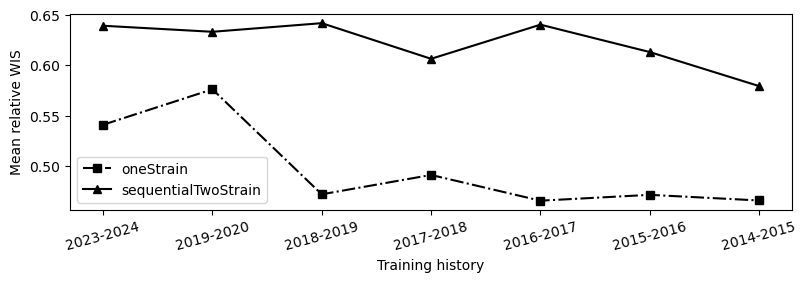

In [316]:
fig,ax=plt.subplots(figsize=(8.3, 11.7/4))
# oneStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['oneStrain'].values, linestyle='-.', marker='s', color='black', markersize=6, label='oneStrain')
# sequentialTwoStrain
ax.plot(data.index.get_level_values('training_horizon').unique(), data.loc['sequentialTwoStrain'].values, marker='^', color='black', markersize=6, label='sequentialTwoStrain')
# formatting
ax.set_xticks(data.index.get_level_values('training_horizon').unique())
ax.set_xticks(ax.get_xticks(), ['2023-2024', '2019-2020', '2018-2019', '2017-2018', '2016-2017', '2015-2016', '2014-2015'], rotation=15, ha='center')
ax.set_xlabel('Training history')
ax.set_ylabel('Mean relative WIS')
ax.legend()
plt.tight_layout()
plt.savefig('incremental-training.pdf')
plt.show()
plt.close()